# Defino features de valores hace 24 hs 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('datos_planta.csv')
df = df.dropna(subset=['state'])
df['humidity_yesterday'] = df['humidity'].shift(150)
df['light_yesterday'] = df['light'].shift(150)
df['temperature_yesterday'] = df['temperature'].shift(150)

# 3. Guardar el nuevo DataFrame con la columna adicional
df.to_csv('datos_planta2.csv', index=False)
print(df.head())

   humidity  light  temperature                timestamp   state  \
0      46.0   21.0        24.13  2025-04-22 07:35:00.595  Normal   
1      43.0   55.0        14.85  2025-04-22 07:45:00.611  Normal   
2      46.0   53.0        12.43  2025-04-22 07:55:00.626  Normal   
3      44.0   62.0        13.46  2025-04-22 08:05:00.641  Normal   
4      44.0   62.0        13.52  2025-04-22 08:15:00.656  Normal   

   humidity_yesterday  light_yesterday  temperature_yesterday  
0                 NaN              NaN                    NaN  
1                 NaN              NaN                    NaN  
2                 NaN              NaN                    NaN  
3                 NaN              NaN                    NaN  
4                 NaN              NaN                    NaN  


In [2]:
df['humidity_yesterday'] = df['humidity'].shift(150).fillna(
    pd.Series(
        np.random.uniform(
            low=df['humidity'].min(),
            high=df['humidity'].max(),
            size=len(df)
    )
))
df['light_yesterday'] = df['light'].shift(150).fillna(
    pd.Series(
        np.random.uniform(
            low=df['light'].min(),
            high=df['light'].max(),
            size=len(df)
    )
))
df['temperature_yesterday'] = df['temperature'].shift(150).fillna(
    pd.Series(
        np.random.uniform(
            low=df['temperature'].min(),
            high=df['temperature'].max(),
            size=len(df)
    )
))
print(df.head())
df.to_csv('datos_planta2.csv', index=False)

   humidity  light  temperature                timestamp   state  \
0      46.0   21.0        24.13  2025-04-22 07:35:00.595  Normal   
1      43.0   55.0        14.85  2025-04-22 07:45:00.611  Normal   
2      46.0   53.0        12.43  2025-04-22 07:55:00.626  Normal   
3      44.0   62.0        13.46  2025-04-22 08:05:00.641  Normal   
4      44.0   62.0        13.52  2025-04-22 08:15:00.656  Normal   

   humidity_yesterday  light_yesterday  temperature_yesterday  
0           20.866686        22.100457              12.908903  
1           21.458104        56.879328              22.456786  
2           80.601658       -15.854140              17.606357  
3           55.158695         0.688076              22.728176  
4           48.758861        77.149996              20.673355  


# Predicción usando Random Forest 70-30

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Supongamos que tus datos están en un DataFrame llamado 'data'
# con columnas: feature1, feature2, feature3, y target (las clases)

# Si tus clases son strings, las convertimos a valores numéricos
label_encoder = LabelEncoder()
df['state_encoded'] = label_encoder.fit_transform(df['state'])

# Separamos features y target
X = df[['humidity_yesterday', 'temperature_yesterday', 'light_yesterday']]
y = df['state_encoded']  # Usamos la versión codificada para el modelo

# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Creamos el modelo Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=50,  # Número de árboles
    criterion='gini',  # Criterio de división
    max_depth=10,    # Profundidad máxima de los árboles
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Entrenamos el modelo
rf_classifier.fit(X_train, y_train)
# Predecimos en el conjunto de test
y_pred = rf_classifier.predict(X_test)

# Convertimos las predicciones numéricas de vuelta a las etiquetas originales
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Evaluamos el modelo
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_labels):.2f}")
print(f"Recall: {recall_score(y_test_labels, y_pred_labels, average='weighted'):.2f}")
print(f"Precision: {precision_score(y_test_labels, y_pred_labels, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test_labels, y_pred_labels, average='weighted'):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.91
Recall: 0.91
Precision: 0.91
F1 Score: 0.91

Reporte de clasificación:
              precision    recall  f1-score   support

     Critico       0.89      0.84      0.87        81
  Muy Triste       0.86      0.92      0.89       185
      Normal       0.95      0.96      0.96       366
      Triste       0.88      0.81      0.84       139

    accuracy                           0.91       771
   macro avg       0.90      0.88      0.89       771
weighted avg       0.91      0.91      0.91       771



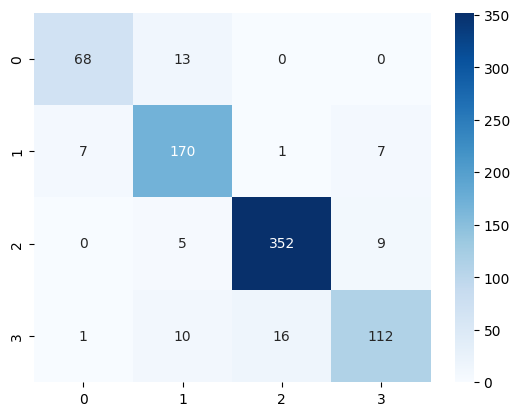

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 1. Definir la grilla de parámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima
    'min_samples_split': [2, 5, 10],  # Mínimo muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Mínimo muestras en hojas
    'class_weight': [None, 'balanced']  # Para manejar clases desbalanceadas
}

# 2. Crear el modelo base
rf = RandomForestClassifier(random_state=42)

# 3. Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Usar todos los cores del CPU
    verbose=2,          # Mostrar progreso
    scoring='accuracy'   # Métrica a optimizar
)

# 4. Ejecutar la búsqueda (asegúrate de que X_train y y_train están definidos)
grid_search.fit(X_train, y_train)

# 5. Resultados
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor score de validación cruzada:")
print(f"{grid_search.best_score_:.4f}")

# 6. Evaluar con el conjunto de test
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nReporte de clasificación con el mejor modelo:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Mejores parámetros encontrados:
{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Mejor score de validación cruzada:
0.8859

Reporte de clasificación con el mejor modelo:
              precision    recall  f1-score   support

     Critico       0.88      0.85      0.87        81
  Muy Triste       0.86      0.90      0.88       185
      Normal       0.96      0.96      0.96       366
      Triste       0.85      0.81      0.83       139

    accuracy                           0.91       771
   macro avg       0.89      0.88      0.88       771
weighted avg       0.91      0.91      0.91       771



# Predicción usando Cross Validation con 15 folds

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score

# 1. Definir el modelo con los mejores parámetros si ya hiciste GridSearch
# Si no, usamos parámetros por defecto
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Útil si tienes clases desbalanceadas
)

# 2. Métricas a calcular durante la validación cruzada
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

# 3. Ejecutar 6-fold cross-validation
cv_results = cross_validate(
    estimator=rf_model,
    X=X,  # Todas tus features
    y=y,  # Tu target codificado
    cv=15,  # 6 folds
    scoring=scoring,
    n_jobs=-1,  # Usar todos los cores del CPU
    return_train_score=True  # Para ver métricas en train también
)

# 4. Procesar y mostrar resultados
print("\nResultados de la Validación Cruzada (15 folds):")
print(f"Accuracy promedio (test): {np.mean(cv_results['test_accuracy']):.4f} (±{np.std(cv_results['test_accuracy']):.4f})")
print(f"Precision promedio (test): {np.mean(cv_results['test_precision']):.4f} (±{np.std(cv_results['test_precision']):.4f})")
print(f"Recall promedio (test): {np.mean(cv_results['test_recall']):.4f} (±{np.std(cv_results['test_recall']):.4f})")
print(f"F1-score promedio (test): {np.mean(cv_results['test_f1']):.4f} (±{np.std(cv_results['test_f1']):.4f})")

# 5. Opcional: Ver resultados por cada fold
print("\nDetalle por fold:")
for i in range(15):
    print(f"Fold {i+1}: Accuracy = {cv_results['test_accuracy'][i]:.4f}")


Resultados de la Validación Cruzada (15 folds):
Accuracy promedio (test): 0.7115 (±0.1765)
Precision promedio (test): 0.7378 (±0.1299)
Recall promedio (test): 0.7115 (±0.1765)
F1-score promedio (test): 0.7005 (±0.1689)

Detalle por fold:
Fold 1: Accuracy = 0.2674
Fold 2: Accuracy = 0.7093
Fold 3: Accuracy = 0.7251
Fold 4: Accuracy = 0.7251
Fold 5: Accuracy = 0.7135
Fold 6: Accuracy = 0.9298
Fold 7: Accuracy = 0.3743
Fold 8: Accuracy = 0.7661
Fold 9: Accuracy = 0.8304
Fold 10: Accuracy = 0.7018
Fold 11: Accuracy = 0.7485
Fold 12: Accuracy = 0.7310
Fold 13: Accuracy = 0.7953
Fold 14: Accuracy = 0.9942
Fold 15: Accuracy = 0.6608


# Predicción usando Regresión Logística

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 1. Crear pipeline con escalado y modelo
# (La regresión logística es sensible a la escala de los features)
log_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        multi_class='multinomial',  # Para problemas multiclase
        solver='lbfgs',            # Algoritmo de optimización
        max_iter=1000,             # Número máximo de iteraciones
        random_state=42,
        class_weight='balanced'    # Para manejar clases desbalanceadas
    )
)

# 2. Entrenar el modelo
log_reg.fit(X_train, y_train)

# 3. Evaluar el modelo
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.6562905317769131

Reporte de clasificación:
              precision    recall  f1-score   support

     Critico       0.35      0.56      0.43        81
  Muy Triste       0.50      0.39      0.44       185
      Normal       0.91      0.87      0.89       366
      Triste       0.47      0.50      0.48       139

    accuracy                           0.66       771
   macro avg       0.56      0.58      0.56       771
weighted avg       0.67      0.66      0.66       771



C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Predicciones usando nuevas features

# Random Forest

In [9]:
df = pd.read_csv('datos_planta2.csv')
df['humidity_squared'] = df['humidity_yesterday'] ** 2
df['log_humidity'] = np.log(df['humidity_yesterday'] + 1)  # +1 para evitar log(0)
threshold = df['humidity_yesterday'].quantile(0.75)
df['is_high_humidity'] = (df['humidity_yesterday'] > threshold).astype(int)
df['humidity_rolling_avg'] = df['humidity_yesterday'].rolling(window=50).mean()
df['humidity_std'] = df['humidity_yesterday'].rolling(window=50).std()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Supongamos que tus datos están en un DataFrame llamado 'data'
# con columnas: feature1, feature2, feature3, y target (las clases)

# Si tus clases son strings, las convertimos a valores numéricos
label_encoder = LabelEncoder()
df['state_encoded'] = label_encoder.fit_transform(df['state'])

# Separamos features y target
X = df[['humidity_yesterday', 'temperature_yesterday', 'light_yesterday', 'humidity_squared', 'log_humidity', 'is_high_humidity', 'humidity_rolling_avg', 'humidity_std']]
y = df['state_encoded']  # Usamos la versión codificada para el modelo

# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Creamos el modelo Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=50,  # Número de árboles
    criterion='gini',  # Criterio de división
    max_depth=10,    # Profundidad máxima de los árboles
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Entrenamos el modelo
rf_classifier.fit(X_train, y_train)
# Predecimos en el conjunto de test
y_pred = rf_classifier.predict(X_test)

# Convertimos las predicciones numéricas de vuelta a las etiquetas originales
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Evaluamos el modelo
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_labels):.2f}")
print(f"Recall: {recall_score(y_test_labels, y_pred_labels, average='weighted'):.2f}")
print(f"Precision: {precision_score(y_test_labels, y_pred_labels, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test_labels, y_pred_labels, average='weighted'):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.96
Recall: 0.96
Precision: 0.96
F1 Score: 0.96

Reporte de clasificación:
              precision    recall  f1-score   support

     Critico       0.94      0.94      0.94        81
  Muy Triste       0.97      0.95      0.96       185
      Normal       0.98      0.98      0.98       366
      Triste       0.93      0.94      0.94       139

    accuracy                           0.96       771
   macro avg       0.95      0.95      0.95       771
weighted avg       0.96      0.96      0.96       771



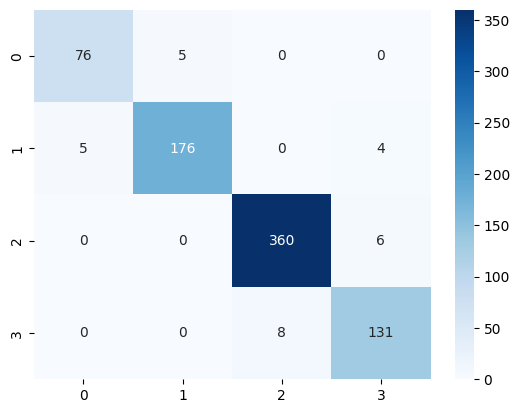

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

# k folds con nuevas features

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score

# 1. Definir el modelo con los mejores parámetros si ya hiciste GridSearch
# Si no, usamos parámetros por defecto
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Útil si tienes clases desbalanceadas
)

# 2. Métricas a calcular durante la validación cruzada
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

# 3. Ejecutar 6-fold cross-validation
cv_results = cross_validate(
    estimator=rf_model,
    X=X,  # Todas tus features
    y=y,  # Tu target codificado
    cv=15,  # 6 folds
    scoring=scoring,
    n_jobs=-1,  # Usar todos los cores del CPU
    return_train_score=True  # Para ver métricas en train también
)

# 4. Procesar y mostrar resultados
print("\nResultados de la Validación Cruzada (15 folds):")
print(f"Accuracy promedio (test): {np.mean(cv_results['test_accuracy']):.4f} (±{np.std(cv_results['test_accuracy']):.4f})")
print(f"Precision promedio (test): {np.mean(cv_results['test_precision']):.4f} (±{np.std(cv_results['test_precision']):.4f})")
print(f"Recall promedio (test): {np.mean(cv_results['test_recall']):.4f} (±{np.std(cv_results['test_recall']):.4f})")
print(f"F1-score promedio (test): {np.mean(cv_results['test_f1']):.4f} (±{np.std(cv_results['test_f1']):.4f})")

# 5. Opcional: Ver resultados por cada fold
print("\nDetalle por fold:")
for i in range(15):
    print(f"Fold {i+1}: Accuracy = {cv_results['test_accuracy'][i]:.4f}")


Resultados de la Validación Cruzada (15 folds):
Accuracy promedio (test): 0.7672 (±0.1448)
Precision promedio (test): 0.8351 (±0.0823)
Recall promedio (test): 0.7672 (±0.1448)
F1-score promedio (test): 0.7517 (±0.1422)

Detalle por fold:
Fold 1: Accuracy = 0.3895
Fold 2: Accuracy = 0.7791
Fold 3: Accuracy = 0.8070
Fold 4: Accuracy = 0.8246
Fold 5: Accuracy = 0.7836
Fold 6: Accuracy = 0.9415
Fold 7: Accuracy = 0.6374
Fold 8: Accuracy = 0.5263
Fold 9: Accuracy = 0.8012
Fold 10: Accuracy = 0.7485
Fold 11: Accuracy = 0.9240
Fold 12: Accuracy = 0.8304
Fold 13: Accuracy = 0.8187
Fold 14: Accuracy = 0.9357
Fold 15: Accuracy = 0.7602
